<a href="https://colab.research.google.com/github/asukasaito/tes-repo/blob/master/Merck_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recidivism of crime in the US.

In [2]:
#mount google dive to be available
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing related library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.impute import SimpleImputer

from lightgbm import LGBMClassifier, plot_importance



#Data import, EDA and Data Clensing

In [4]:
url = 'drive/MyDrive/Recidivism.csv'
df  = pd.read_csv(url)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   ID                                                 25835 non-null  float64 
 1   Gender                                             25835 non-null  category
 2   Race                                               25835 non-null  category
 3   Residence_PUMA                                     25835 non-null  float64 
 4   Gang_Affiliated                                    25835 non-null  category
 5   Supervision_Risk_Score_First                       25835 non-null  float64 
 6   Supervision_Level_First                            25835 non-null  category
 7   Education_Level                                    25835 non-null  category
 8   Dependents                                         25835 non-null  float64 


In [14]:
  df.head().transpose()

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Gender,M,M,M,M,M
Race,BLACK,BLACK,BLACK,WHITE,WHITE
Residence_PUMA,16.0,16.0,24.0,16.0,16.0
Gang_Affiliated,False,False,False,False,False
Supervision_Risk_Score_First,3.0,6.0,7.0,7.0,4.0
Supervision_Level_First,Standard,Specialized,High,High,Specialized
Education_Level,At least some college,Less than HS diploma,At least some college,Less than HS diploma,Less than HS diploma
Dependents,3.0,1.0,3.0,1.0,3.0
Prison_Offense,Drug,Violent/Non-Sex,Drug,Property,Violent/Non-Sex


In [15]:
#Check number of NAs
df.isna().sum()

ID                                                   0
Gender                                               0
Race                                                 0
Residence_PUMA                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Supervision_Level_First                              0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Conv

#EDA


In [96]:
#check value counts for each

#df['Prison_Years'].value_counts()
df['Delinquency_Reports'].value_counts()
df['Program_UnexcusedAbsences'].value_counts()
df['Residence_Changes'].value_counts()
df['Prior_Conviction_Episodes_Drug'].value_counts()
df['Gang_Affiliated'].value_counts()


Gang_Affiliated
False    18730
True      3938
Other     3167
Name: count, dtype: int64

In [71]:
print(df['Prison_Offense'].value_counts())
print(df['Supervision_Level_First'].value_counts())

#df['Gang_Affiliated'].dtype

Prison_Offense
Property           8284
Violent/Non-Sex    5475
Drug               5190
Other              2779
Violent/Sex         830
Name: count, dtype: int64
Supervision_Level_First
Standard       9983
Specialized    7123
High           7009
Name: count, dtype: int64


In [73]:
#df['Training_Sample'].value_counts()
df['Recidivism_Within_3years'].value_counts()

Recidivism_Within_3years
True     14904
False    10931
Name: count, dtype: int64

In [83]:
#df.describe()

In [74]:
df['Race'].value_counts()

Race
BLACK    14847
WHITE    10988
Name: count, dtype: int64

In [75]:
df['Age_at_Release'].value_counts()

Age_at_Release
23-27          5176
28-32          4982
33-37          4271
48 or older    3727
38-42          2993
43-47          2620
18-22          2066
Name: count, dtype: int64

In [87]:
# url = 'drive/MyDrive/Recidivism.csv'
# df  = pd.read_csv(url)

In [5]:
#prep for fillin NAs
#average for numerical variable, "others" for category, and majorigy for boolen,
numerical_imputer = SimpleImputer(strategy='mean')
#categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer = SimpleImputer(strategy='constant', fill_value='others')
boolean_imputer = SimpleImputer(strategy='most_frequent')

In [6]:

for col in df.columns:
    # if df[col].dtype == 'object':
    #     df[col] = categorical_imputer.fit_transform(df[[col]])
    if df[col].dtype == 'category':
        df[col] = categorical_imputer.fit_transform(df[[col]])
    if df[col].dtype in ['int64', 'float64']:
        df[col] = numerical_imputer.fit_transform(df[[col]])
    elif df[col].dtype == 'bool':
        df[col] = boolean_imputer.fit_transform(df[[col]].astype('object')).astype('bool')
    else:
        continue

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

        #print(df[col].value_counts())

In [7]:
df['Age_at_Release_num'] = df['Age_at_Release'].str.extract(r'(\d{2})').astype(int)
df.drop('Age_at_Release', axis=1, inplace=True)

In [10]:
df['Gang_Affiliated'] = df['Gang_Affiliated'].cat.add_categories(['Other'])
df['Gang_Affiliated'] = df['Gang_Affiliated'].fillna('Other')
#df['Prison_Offense'] = df['Prison_Offense'].cat.add_categories(['Other'])
df['Prison_Offense'] = df['Prison_Offense'].fillna('Other')
df['Supervision_Level_First'] = df['Supervision_Level_First'].cat.add_categories(['Other'])
df['Supervision_Level_First'] = df['Supervision_Level_First'].fillna('Other')



In [8]:
#Mapping and converting categorical variable to numerics
ordinal_map = {
    'Less than 1 year': 1,
    '1-2 years': 2,
    'Greater than 2 to 3 years': 3,
    'More than 3 years': 4
}
df['Prison_Years_Ordinal'] = df['Prison_Years'].map(ordinal_map)
df.drop('Prison_Years', axis=1, inplace=True)

In [9]:
df['Prison_Years_Ordinal'].astype(int)

0        4
1        4
2        2
3        2
4        2
        ..
25830    4
25831    4
25832    4
25833    4
25834    4
Name: Prison_Years_Ordinal, Length: 25835, dtype: int64

In [11]:
# revemove "or more" and covnert categorical variable to numeric
def clean_x_or_more(df):
    # Loop through each column that could potentially contain string values
    for column in df.columns:
        if df[column].dtype == 'category' :  # Check if the column is of object type
            # Check if any row in the column contains the "X or more" pattern
            if df[column].str.contains(r'\b\d+\sor more\b', regex=True, na=False).any():
                # Remove " or more" from the entire column
                df[column] = df[column].str.replace(r'\sor more\b', '', regex=True)
                df[column] = pd.to_numeric(df[column], errors='ignore').astype(float)
    return df
df = clean_x_or_more(df)

AttributeError: Can only use .str accessor with string values!

In [12]:
#one-hot coding for following operations
df_with_dummies = pd.get_dummies(df, columns=None, drop_first=True)

In [102]:
df_with_dummies.isna().sum()

ID                                0
Residence_PUMA                    0
Supervision_Risk_Score_First      0
Dependents                        0
Prior_Arrest_Episodes_Felony      0
                                 ..
Prison_Offense_Violent/Non-Sex    0
Prison_Offense_Violent/Sex        0
Prison_Years_Ordinal_3            0
Prison_Years_Ordinal_1            0
Prison_Years_Ordinal_4            0
Length: 63, dtype: int64

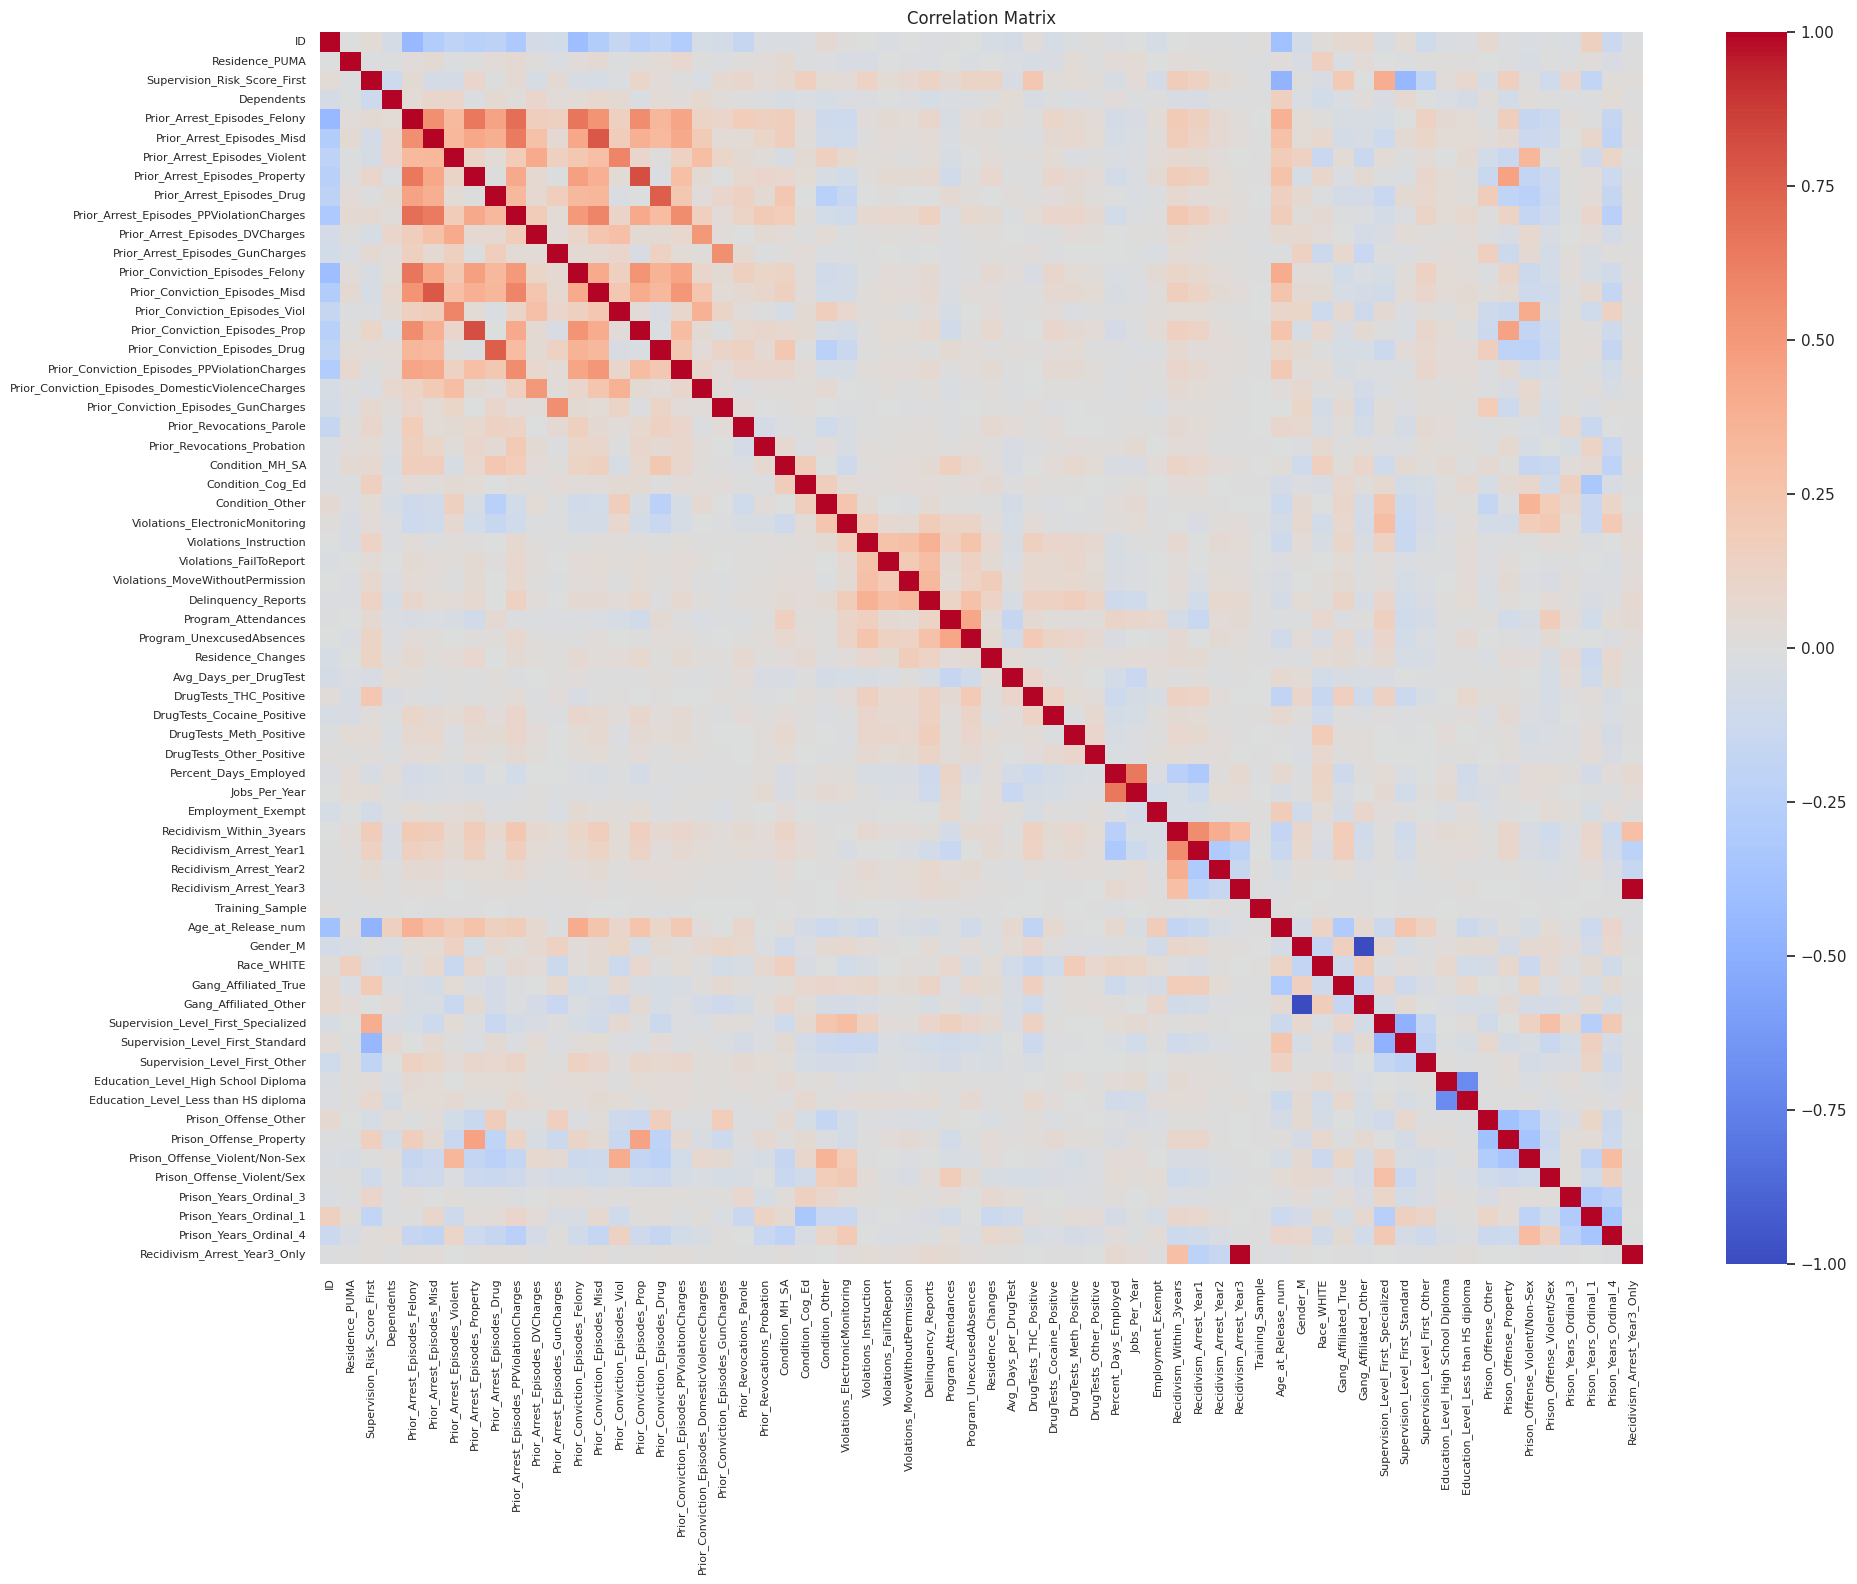

In [166]:
#check the correlation
plt.figure(figsize=(20, 16))
sns.heatmap(df_with_dummies.corr(),  cmap='coolwarm') #annot=True,
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


#Modeling

In [103]:
#prep data for training and testing
df1 =df_with_dummies.drop(['ID','Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3','Training_Sample'],axis = 1)
X1 = df1.drop('Recidivism_Within_3years', axis=1)
y1 = df1['Recidivism_Within_3years']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [104]:
#set models and parameters
param_grids = {
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'num_leaves': [30, 50],
            'learning_rate': [0.1, 0.05]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1,  10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10]
        }
    }
}

In [106]:
#training a model
f1_scorer = make_scorer(f1_score)

results = []

#loop for each model + params using gridsearch
for model_name, grid in param_grids.items():
    grid_search = GridSearchCV(grid['model'], grid['params'], scoring=f1_scorer, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)


    # Save the results
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'F1_Train': f1_train,
        'F1_Test': f1_test
    })

# Convert the list to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9534, number of negative: 7000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1431
[LightGBM] [Info] Number of data points in the train set: 16534, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576630 -> initscore=0.308954
[LightGBM] [Info] Start training from score 0.308954
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9533, number of negative: 7001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                Model                            Best Parameters  F1_Train  \
0            LightGBM  {'learning_rate': 0.05, 'num_leaves': 30}  0.812406   
1  LogisticRegression                                  {'C': 10}  0.758755   
2        RandomForest     {'max_depth': 10, 'n_estimators': 100}  0.841182   

    F1_Test  
0  0.795999  
1  0.760640  
2  0.786590  


#Evaluation

                Model                            Best Parameters  F1_Train  \
0            LightGBM  {'learning_rate': 0.05, 'num_leaves': 30}  0.812406   
1  LogisticRegression                                  {'C': 10}  0.758755   
2        RandomForest     {'max_depth': 10, 'n_estimators': 100}  0.841182   

    F1_Test  
0  0.795999  
1  0.760640  
2  0.786590  


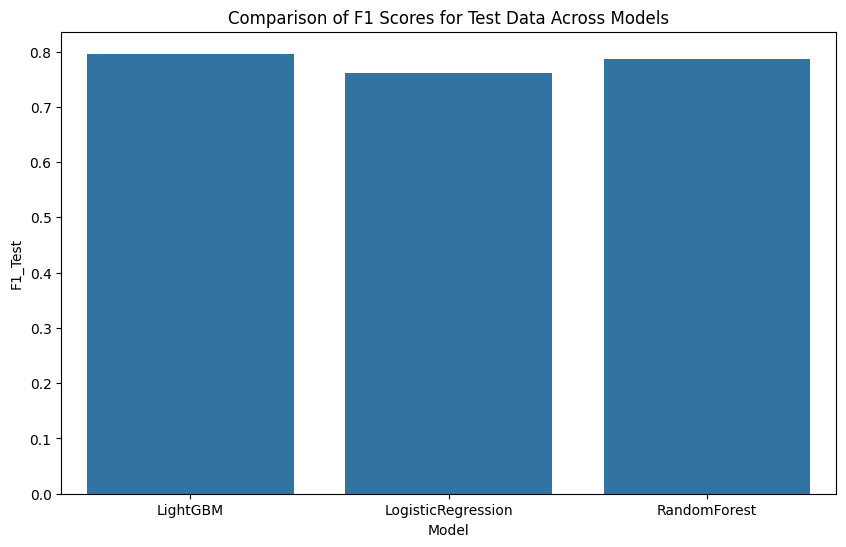

In [107]:
# Display the summary table of best models
print(results_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1_Test', data=results_df)
plt.title('Comparison of F1 Scores for Test Data Across Models')
plt.show()

In [109]:
# re-run the best model and get four metrics
model = LGBMClassifier(learning_rate=0.05,num_leaves = 30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11917, number of negative: 8751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1470
[LightGBM] [Info] Number of data points in the train set: 20668, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.576592 -> initscore=0.308798
[LightGBM] [Info] Start training from score 0.308798
Model Accuracy: 0.75130636733114
Precision: 0.7569
Recall: 0.8393
F1 Score: 0.7960


In [112]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.1 MB/s eta 0:00:00


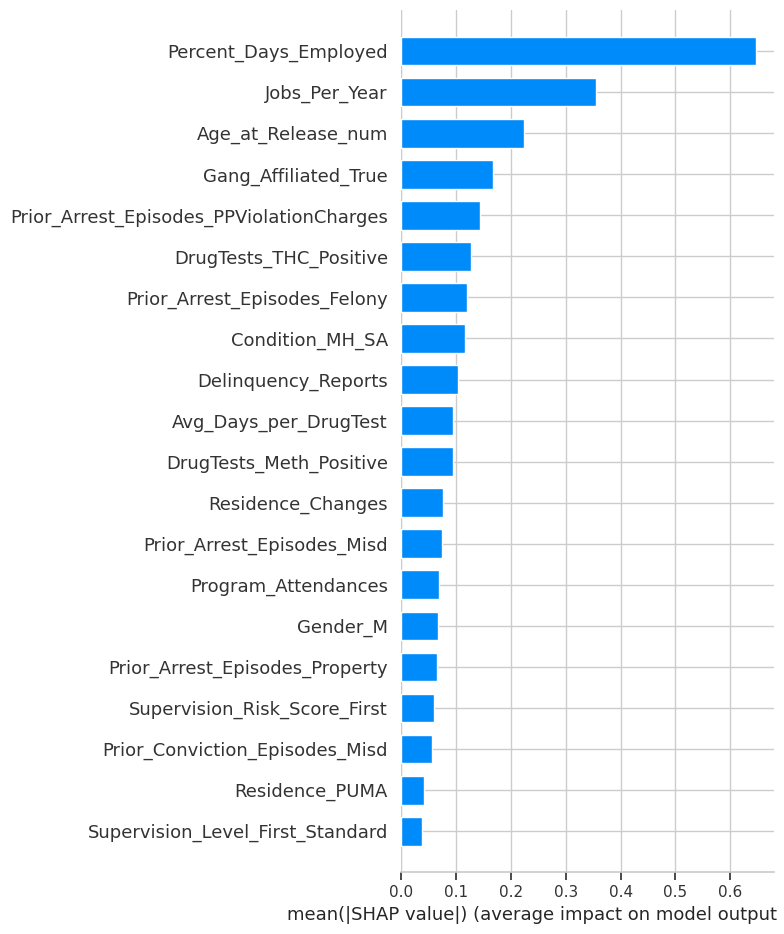

In [118]:
#to show shaplay; which feature influence more
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

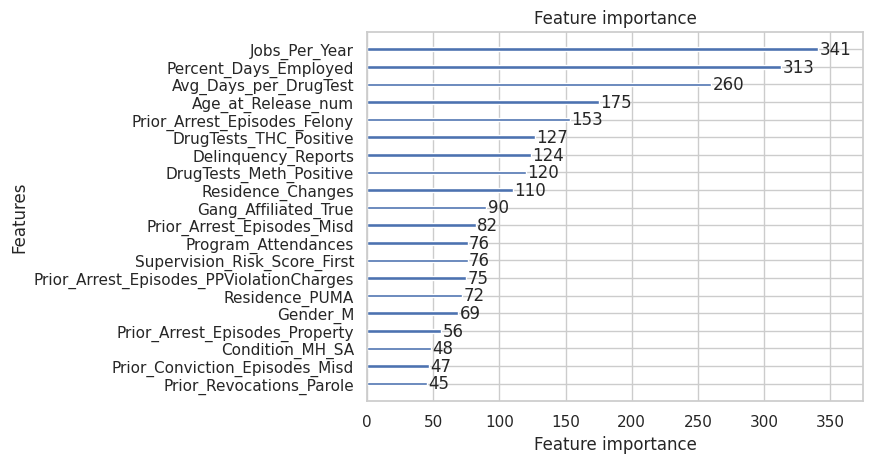

In [110]:
#to show feature importance; which feature more lilky influence
plot_importance(model, max_num_features=20)
plt.show()

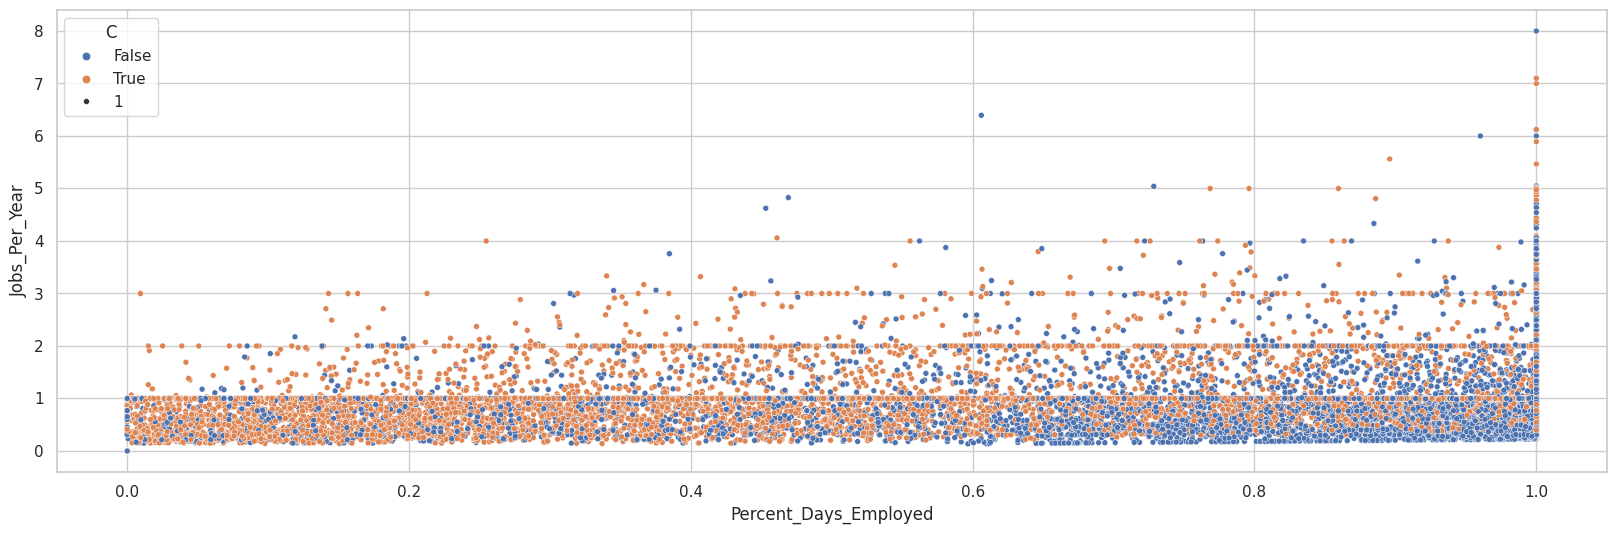

In [123]:
#to show scatter plot for the most 2 impactful featus
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Percent_Days_Employed', y='Jobs_Per_Year', hue='Recidivism_Within_3years',  size=1)

plt.legend(title='C')
plt.show()


In [ ]:

# print( df.groupby('Recidivism_Within_3years')['Jobs_Per_Year'].mean())
# print( df.groupby('Recidivism_Within_3years')['Percent_Days_Employed'].mean())
# print( df.groupby('Recidivism_Within_3years')['Avg_Days_per_DrugTest'].mean())


##modeling for "People who are caught recividing early: Recidivism_Arrest_Year1=TRUE"

In [141]:
df2 =df_with_dummies.drop(['ID','Recidivism_Within_3years','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3','Training_Sample'],axis = 1)
X2 = df2.drop('Recidivism_Arrest_Year1', axis=1)
y2 = df2['Recidivism_Arrest_Year1']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [142]:
#check the balance
df2['Recidivism_Arrest_Year1'].value_counts()

Recidivism_Arrest_Year1
False    18111
True      7724
Name: count, dtype: int64

In [144]:

model = LGBMClassifier(learning_rate=0.05,num_leaves = 30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6174, number of negative: 14494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1472
[LightGBM] [Info] Number of data points in the train set: 20668, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.298723 -> initscore=-0.853388
[LightGBM] [Info] Start training from score -0.853388
Model Accuracy: 0.8128507838203987
Precision: 0.7158
Recall: 0.6239
F1 Score: 0.6667


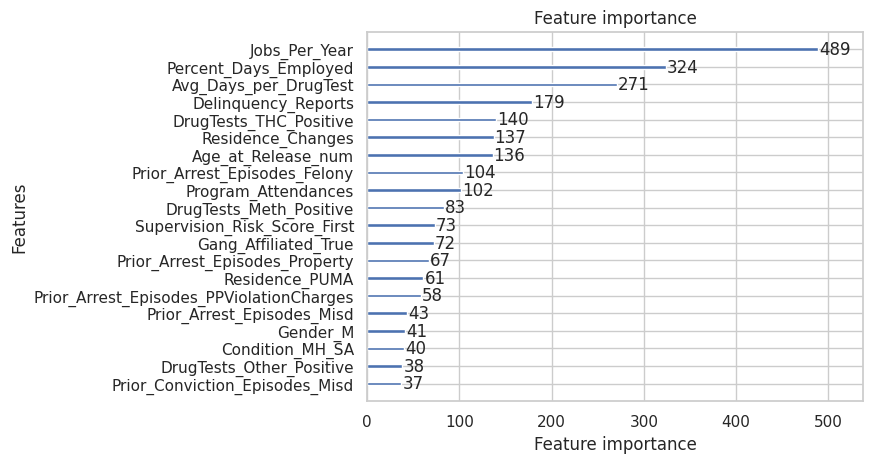

In [127]:
plot_importance(model, max_num_features=20)
plt.show()

##modeling for "People who are caught recividing later only: Recidivism_Arrest_Year3==TRUE while Recidivism_Arrest_Year1==FALSE and Recidivism_Arrest_Year2==FALSE"

In [149]:
df3 =df_with_dummies
df3['Recidivism_Arrest_Year3_Only'] = (df3['Recidivism_Arrest_Year3'] == True) & \
                  (df3['Recidivism_Arrest_Year1'] == False) & \
                  (df3['Recidivism_Arrest_Year2'] == False)
df3 =df3.drop(['ID','Recidivism_Within_3years','Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3','Training_Sample'],axis = 1)
X3 = df3.drop('Recidivism_Arrest_Year3_Only', axis=1)
y3 = df3['Recidivism_Arrest_Year3_Only']
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [150]:
df3['Recidivism_Arrest_Year3_Only'].value_counts()

Recidivism_Arrest_Year3_Only
False    23222
True      2613
Name: count, dtype: int64

In [151]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [152]:

model = LGBMClassifier(learning_rate=0.05,num_leaves = 30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2077, number of negative: 18591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1470
[LightGBM] [Info] Number of data points in the train set: 20668, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100494 -> initscore=-2.191753
[LightGBM] [Info] Start training from score -2.191753
Model Accuracy: 0.896458293013354
Precision: 1.0000
Recall: 0.0019
F1 Score: 0.0037


In [17]:
# df4 =df_with_dummies
# df4['Recidivism_Score'] = 0
# df4.loc[df['Recidivism_Arrest_Year1'], 'Recidivism_Score'] = 1
# df4.loc[df['Recidivism_Arrest_Year2'] & ~df4['Recidivism_Arrest_Year1'], 'Recidivism_Score'] = 2
# df4.loc[df['Recidivism_Arrest_Year3'] & ~df4['Recidivism_Arrest_Year1'] & ~df4['Recidivism_Arrest_Year2'], 'Recidivism_Score'] = 3

# df4 =df4.drop(['ID','Recidivism_Within_3years','Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3','Training_Sample'],axis = 1)
# X4 = df4.drop('Recidivism_Score', axis=1)
# y4 = df4['Recidivism_Score']
# X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [19]:

# model = LGBMClassifier(learning_rate=0.05,num_leaves = 30)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# # Update the metric calculations for multi-class
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')
# f1 = f1_score(y_test, y_pred, average='macro')

# print(f"Model Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1470
[LightGBM] [Info] Number of data points in the train set: 20668, number of used features: 57
[LightGBM] [Info] Start training from score -0.859419
[LightGBM] [Info] Start training from score -1.208240
[LightGBM] [Info] Start training from score -1.729485
[LightGBM] [Info] Start training from score -2.297662
Model Accuracy: 0.6062
Precision: 0.4989
Recall: 0.4357
F1 Score: 0.4011


#Build a neural network model

In [154]:
#import related ones
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K

In [155]:
#prep for data as same as the first one
df1 =df_with_dummies.drop(['ID','Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3','Training_Sample'],axis = 1)
X1 = df1.drop('Recidivism_Within_3years', axis=1)
y1 = df1['Recidivism_Within_3years']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#adjust the scale to balance variables.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [157]:
# Define the input shape
input_shape = X_train.shape[1]
inputs = keras.Input(shape=(input_shape,))

# Dense layers
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # to prevent overfitting

# Output layer; sigmoid activation for binary classification
outputs = layers.Dense(1, activation='sigmoid')(x)


# modeling and setting up parameters. used major and basic one; adam
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 58)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                3776      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.

Epoch 1/10
453/453 [==============================] - 3s 3ms/step - loss: 0.5647 - accuracy: 0.7004 - val_loss: 0.5007 - val_accuracy: 0.7441
Epoch 2/10
453/453 [==============================] - 1s 3ms/step - loss: 0.5063 - accuracy: 0.7455 - val_loss: 0.4933 - val_accuracy: 0.7489
Epoch 3/10
453/453 [==============================] - 2s 4ms/step - loss: 0.4951 - accuracy: 0.7512 - val_loss: 0.4903 - val_accuracy: 0.7539
Epoch 4/10
453/453 [==============================] - 2s 4ms/step - loss: 0.4874 - accuracy: 0.7554 - val_loss: 0.4973 - val_accuracy: 0.7500
Epoch 5/10
453/453 [==============================] - 1s 3ms/step - loss: 0.4817 - accuracy: 0.7631 - val_loss: 0.4879 - val_accuracy: 0.7520
Epoch 6/10
453/453 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.7637 - val_loss: 0.4863 - val_accuracy: 0.7554
Epoch 7/10
453/453 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.7678 - val_loss: 0.4866 - val_accuracy: 0.7510
Epoch 

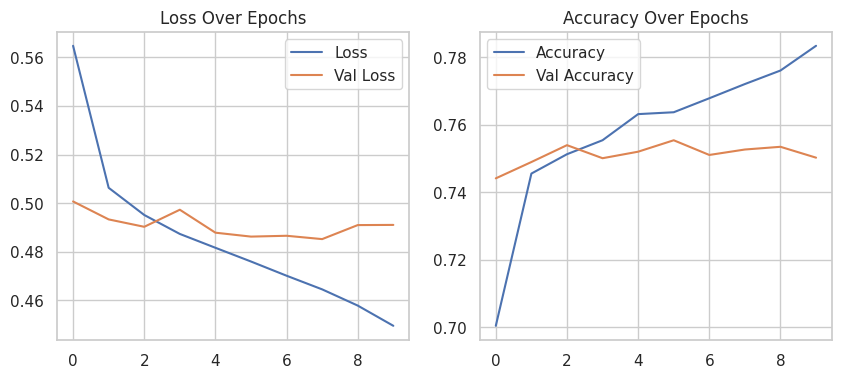

In [158]:

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.3,
                    verbose = 1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [159]:
#predicting
y_pred = model.predict(X_test)


162/162 [==============================] - 0s 1ms/step


In [160]:
#evaluating the performance
y_pred_b  = [value >= 0.5 for value in y_pred]
accuracy = accuracy_score(y_test, y_pred_b)
precision = precision_score(y_test, y_pred_b)
recall = recall_score(y_test, y_pred_b)
f1 = f1_score(y_test, y_pred_b)

print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Accuracy: 0.7544029417456938
Precision: 0.7771
Recall: 0.8065
F1 Score: 0.7915
